### 회귀 트리
- 회귀 함수를 기반으로 하지 않고 결정 트리와 같이 트리를 기반으로 하는 회귀 방식
- 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측
- 리프 노드에서 예측 결정 값을 만드는 과정에서 분류 트리가 특정 클래스 레이블을 결정하는 것과 달리 회귀 트리는 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산
- 결정트리, 랜덤 포레스트, GBM, XGBOOST, LIGHTGBM 등 트리 기반의 알고리즘은 분류뿐만 아니라 회귀도 가능한데 트리 생성이 CART(Classification And Regression Trees)에 기반하고 있기 때문이며 CART는 분류뿐만 아니라 회귀도 가능하게 해주는 트리 생성 알고리즘임


In [5]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

boston_df['PRICE'] = boston.target

X = boston_df.drop('PRICE',axis = 1)
y = boston_df['PRICE']

rf = RandomForestRegressor(random_state = 0, n_estimators = 1000)
neg_mse_score = cross_val_score(rf,X,y,scoring = 'neg_mean_squared_error',cv = 5)

rmse = np.sqrt(-1*neg_mse_score)
avg_rmse = np.mean(rmse)

print('mse: ',neg_mse_score)
print('rmse: ',rmse)
print('평균: ',avg_rmse)

mse:  [ -7.88289687 -13.14313491 -20.57389346 -46.22586666 -18.87809457]
rmse:  [2.80764971 3.62534618 4.5358454  6.7989607  4.34489293]
평균:  4.422538982804892


In [7]:
# 교차검증 사용자 함수 작성 후 XGBRegressor 클래스를 사용하여 학습 후 검증
def get_model_cv_prediction(model,X,y):
    neg_mse_score = cross_val_score(model,X,y,scoring = 'neg_mean_squared_error',cv = 5)
    rmse = np.sqrt(-1*neg_mse_score)
    avg_rmse = np.mean(rmse)
    print('평균 rmse: ',round(avg_rmse,4))
    
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(n_estimators = 1000)
get_model_cv_prediction(xgb_reg,X,y)

평균 rmse:  4.2511


In [10]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()

get_model_cv_prediction(dt_reg,X,y)

평균 rmse:  6.4697


In [12]:
from lightgbm import LGBMRegressor

lgbm_reg = LGBMRegressor(n_estimators = 1000)
get_model_cv_prediction(lgbm_reg,X,y)

평균 rmse:  4.6464


<AxesSubplot:>

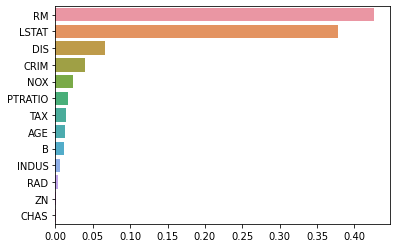

In [13]:
import seaborn as sns

rf = RandomForestRegressor(random_state = 0, n_estimators = 1000)
rf.fit(X,y)

feature_series = pd.Series(data = rf.feature_importances_,index = X.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series,y=feature_series.index)

(100, 2)


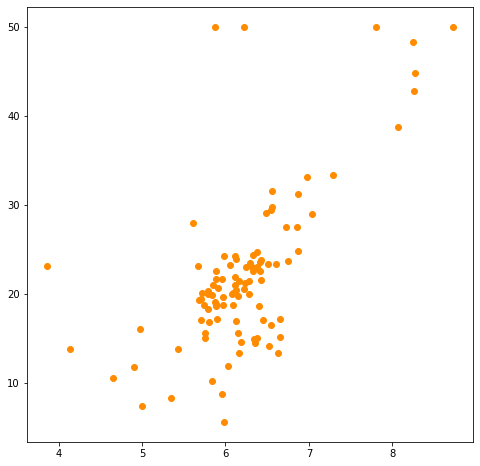

In [16]:
import matplotlib.pyplot as plt
boston_sample = boston_df[['RM','PRICE']]
boston_sample = boston_sample.sample(n=100,random_state = 0)
print(boston_sample.shape)
plt.figure(figsize = (8,8))
plt.scatter(boston_sample.RM, boston_sample.PRICE, c = 'darkorange')

In [17]:
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
dt_reg2 = DecisionTreeRegressor(max_depth=2)
dt_reg7 = DecisionTreeRegressor(max_depth=7)

# test용 데이터셋 : 4.5 ~ 8.5 사이 100개
X_test = np.arange(4.5,8.5,0.04).reshape(-1,1)

X = boston_sample['RM'].values.reshape(-1,1)
y = boston_sample['PRICE'].values.reshape(-1,1)

lr_reg.fit(X,y)
dt_reg2.fit(X,y)
dt_reg7.fit(X,y)

pred_lr = lr_reg.predict(X_test)
pred_dt2 = dt_reg2.predict(X_test)
pred_dt7 = dt_reg7.predict(X_test)

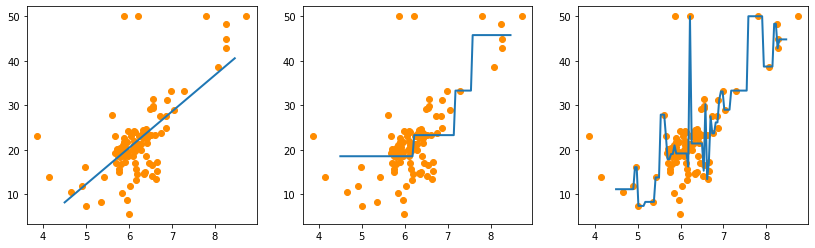

In [19]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize = (14,4),ncols = 3)

axs = [ax1,ax2,ax3]
preds = [pred_lr,pred_dt2,pred_dt7]

for ax, pred in zip(axs, preds):
    ax.scatter(boston_sample.RM, boston_sample.PRICE, c = 'darkorange')
    ax.plot(X_test,pred,linewidth=2)